## Project 7 - Iris

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.


### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing the dataset

In [24]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 7 - Iris'

#### Loading the dataset

In [25]:
df1 = pd.read_csv('iris_data.csv', header=None)
df1

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df2 = pd.read_csv('Iris_names.csv', header = None)
df2

,0
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [38]:
temp = ['sepal length in cm']
for i in range(1,len(df2[0])):
    temp.append(df2[0][i])
print (temp)

df1.columns = temp
print(df1.head)

['sepal length in cm', ' sepal width in cm', ' petal length in cm', ' petal width in cm', ' class']
<bound method NDFrame.head of      sepal length in cm   sepal width in cm   petal length in cm  \
0                   5.1                 3.5                  1.4   
1                   4.9                 3.0                  1.4   
2                   4.7                 3.2                  1.3   
3                   4.6                 3.1                  1.5   
4                   5.0                 3.6                  1.4   
..                  ...                 ...                  ...   
145                 6.7                 3.0                  5.2   
146                 6.3                 2.5                  5.0   
147                 6.5                 3.0                  5.2   
148                 6.2                 3.4                  5.4   
149                 5.9                 3.0                  5.1   

      petal width in cm           class  
0          

#### Converting the Data into a DataFrame

In [39]:
df = pd.DataFrame(df1)
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Detail and description of the DataFrame

In [71]:
df.shape

(150, 5)

In [72]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Cleaning

In [73]:
df.isnull().sum()/df.shape[0] *100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
 class          0.0
dtype: float64

In [74]:
#### To show a quick insight to the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4    class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Counting the details of the last column in our DataFrame

In [75]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', ' class'], dtype='object')

In [76]:
# Counting the values
df[' class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name:  class, dtype: int64

In [77]:
# Normalized value counts
df[' class'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name:  class, dtype: float64

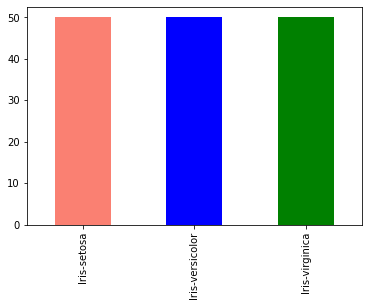

In [78]:
# Plot the value counts with a bar graph
df[' class'].value_counts().plot(kind="bar", color=["salmon", "blue","green"]);

In [79]:
df.rename(columns = {'sepal length in cm':'sepal_length'}, inplace = True)

In [80]:
df.rename(columns = {' sepal width in cm':'sepal_width'}, inplace = True)

In [81]:
df.rename(columns = {' petal length in cm':'petal_length'}, inplace = True)

In [82]:
df.rename(columns = {' petal width in cm':'petal_width'}, inplace = True)

In [98]:
df.rename(columns = {'class':'Class'}, inplace = True)

In [99]:
df

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [91]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

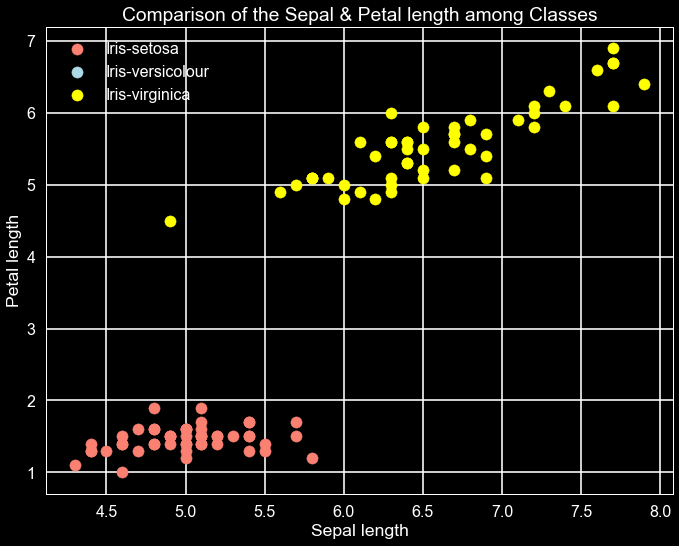

In [123]:
# Create a Scatter plot figure

plt.figure(figsize=(10,8))

plt.scatter(df.sepal_length[df.Class=='Iris-setosa'], 
            df.petal_length[df.Class=='Iris-setosa'], 
            c="salmon") 

plt.scatter(df.sepal_length[df.Class=='Iris-versicolour'], 
            df.petal_length[df.Class=='Iris-versicolour'], 
            c="lightblue") 

plt.scatter(df.sepal_length[df.Class=='Iris-virginica'], 
            df.petal_length[df.Class=='Iris-virginica'], 
            c="yellow") 

plt.title("Comparison of the Sepal & Petal length among Classes")
plt.xlabel("Sepal length")
plt.ylabel("Petal length");
plt.legend(["Iris-setosa", "Iris-versicolour","Iris-virginica"]);


In [125]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [132]:
plt.style.use('bmh')

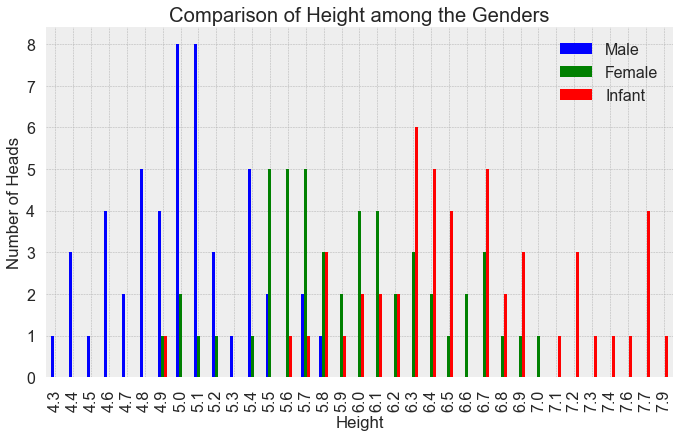

In [133]:
# Create a plot
pd.crosstab(df.sepal_length, df.Class).plot(kind="bar", figsize=(10,6), color=["blue", "green","red"])

plt.title("Comparison of Height among the Genders")
plt.xlabel("Height")
plt.ylabel("Number of Heads")
plt.legend(["Male", "Female","Infant"])
plt.xticks(rotation=90); 

#### Correlation between independent variables

In [134]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


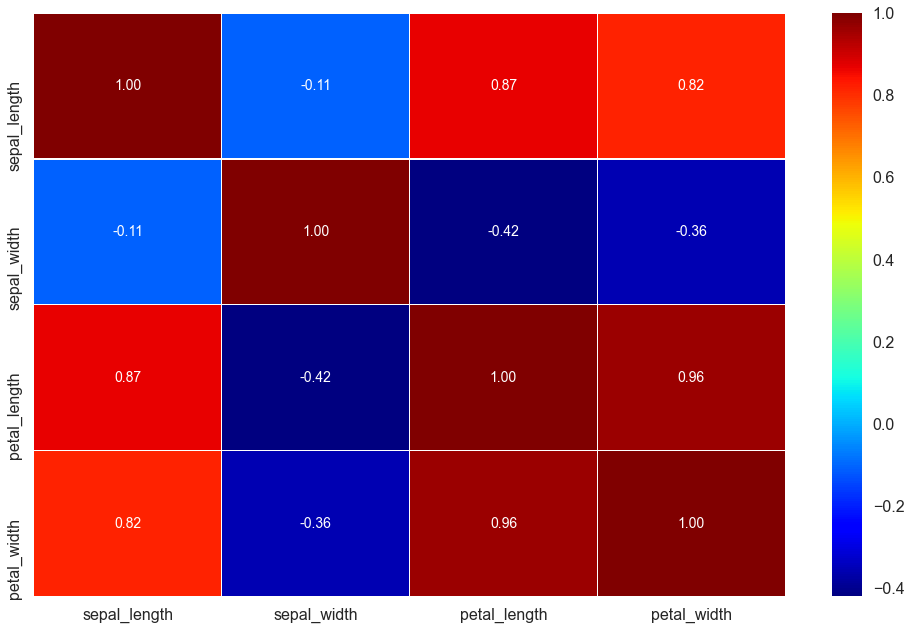

In [148]:
# Another figure with a little better look

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap="jet");

#### Modelling

In [149]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
df.reset_index(inplace=True)

In [151]:
# Everything except target variable
X = df.drop("Class", axis=1)

# Target variable
y = df["Class"]

In [152]:
# Independent variables (no target column)
X.head()

,index,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [153]:
X.drop('index', axis=1, inplace=True)

In [154]:
# Sex column
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

#### Splitting the data into Train & Test

In [155]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [156]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [164]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [160]:
y_train, len(y_train)

(22         Iris-setosa
 15         Iris-setosa
 65     Iris-versicolor
 11         Iris-setosa
 42         Iris-setosa
             ...       
 71     Iris-versicolor
 106     Iris-virginica
 14         Iris-setosa
 92     Iris-versicolor
 102     Iris-virginica
 Name: Class, Length: 120, dtype: object,
 120)

In [162]:
y_test.head(), len(y_test)

(73     Iris-versicolor
 18         Iris-setosa
 118     Iris-virginica
 78     Iris-versicolor
 76     Iris-versicolor
 Name: Class, dtype: object,
 30)

#### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [166]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(X_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(X_test)

#actual
LR_actual_y_test = y_test

In [167]:
LR_predicted_y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [168]:
LR_actual_y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Class, dtype: object

### K-Nearest Neighbors Classifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [170]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [171]:
KNN_predicted_y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [172]:
KNN_actual_y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Class, dtype: object

### RandomForest Classification

In [173]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [174]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [175]:
RF_predicted_y_test

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [176]:
RF_actual_y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Class, dtype: object

### Model Comparison

In [177]:
print ( 'Logistic Regression:',LR_model.score(X_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(X_train,y_train),
        'Random Forest Classifier:',RF_model.score(X_train,y_train),sep="\n")

Logistic Regression:
0.975
K-Nearest Neighbor:
0.95
Random Forest Classifier:
0.9416666666666667


<Figure size 1440x1296 with 0 Axes>

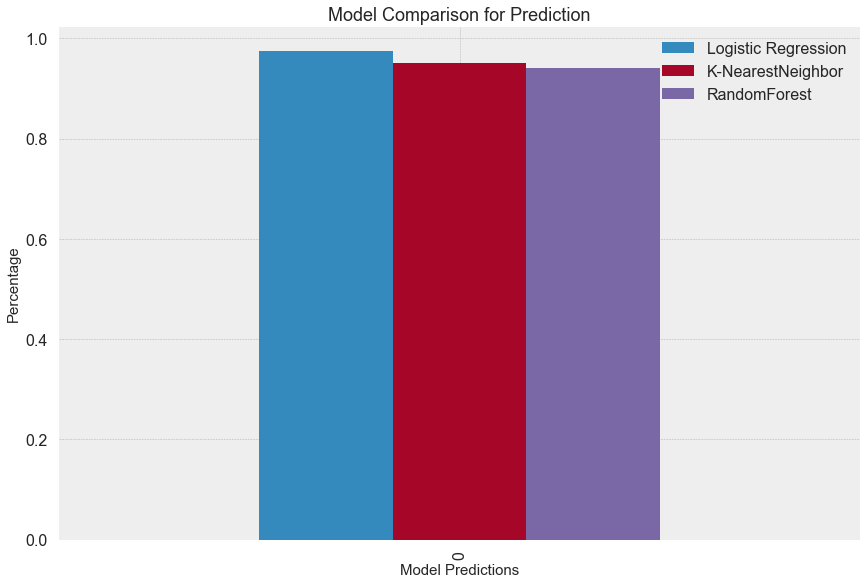

In [178]:
# A figure created to show the comparison of the three model predictions

A = (LR_model.score(X_train,y_train),KNN_model.score(X_train, y_train),RF_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest"]);